# Part 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Data Visualization

In [2]:
path='origin_data.xls'
df=pd.read_excel(path,header=1)
df.rename(columns={'default payment next month':'default'},inplace=True) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# This is a unbalanced dataset
df['default'].mean()

0.2212

Text(0.5, 1.02, 'Exploratory analysis of raw data')

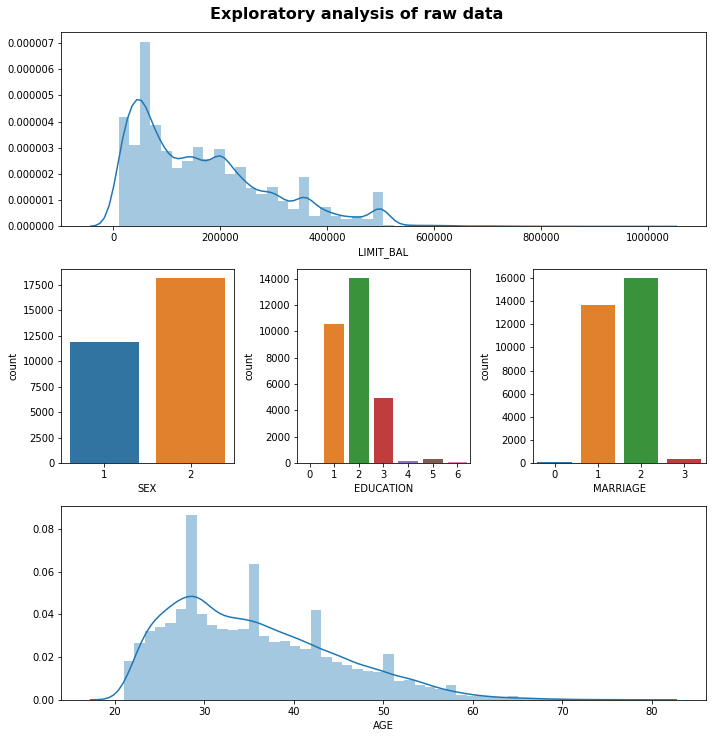

In [4]:
# Visualization【Limit_Bal】【Sex】【Education】【Marriage】【Age】these five features.
fig = plt.figure(figsize=(10, 10))
ax1=plt.subplot2grid((3,3),(0,0),colspan=3)
ax2=plt.subplot2grid((3,3),(1,0),)
ax3=plt.subplot2grid((3,3),(1,1),)
ax4=plt.subplot2grid((3,3),(1,2),)
ax5=plt.subplot2grid((3,3),(2,0),colspan=3)
sns.distplot(df.LIMIT_BAL,ax=ax1)
sns.countplot(df.SEX,ax=ax2)
sns.countplot(df.EDUCATION,ax=ax3)
sns.countplot(df.MARRIAGE,ax=ax4)
sns.distplot(df.AGE, ax=ax5)
plt.tight_layout()
plt.suptitle('Exploratory analysis of raw data',y=1.02,fontsize=16,weight='bold')

## 1.2 Data Cleaning

### (1) Delete Outliers 

In [5]:
# Since （0，4，5，6）in【education】 and （0，3）in 【marriage】 is meaningless and only account for a small part,
# we just delete them.
edulist=[1,2,3]
marriagelist=[1,2]
df=df[df['EDUCATION'].isin(edulist)]
df=df[df['MARRIAGE'].isin(marriagelist)]

### (2) Discretization of Continuous Variables

In [6]:
# Age, also delete ages more than 70.
agebins = np.arange(20, 80, 10)
agebinlabels = ['{}s'.format(i, j) for i, j in zip(agebins, agebins[1:])]
df['AGE_GROUP']=pd.cut(df.AGE,bins=agebins,labels=agebinlabels,right=False)

In [7]:
# Limit_Bal, also delete Limit_Bal more than 50w.
creditlimitbins = np.arange(0, 550000, 50000)
creditbinlabels = ['{}-{}k'.format(i//1000, j//1000) for i, j in zip(creditlimitbins, creditlimitbins[1:])]
df['LIMIT_BAL_GROUP'] = pd.cut(df.LIMIT_BAL, bins=creditlimitbins, labels=creditbinlabels)

### (3) Dealing with Categorical Data

In [8]:
sexdict={1:'Male',2:'Female'}
edudict={1:'Grad School', 2:'University', 3:'High School'}
marriagedict = {1:'Married', 2:'Single'}
df.SEX=df.SEX.map(sexdict)
df.EDUCATION = df.EDUCATION.map(edudict)
df.MARRIAGE = df.MARRIAGE.map(marriagedict)

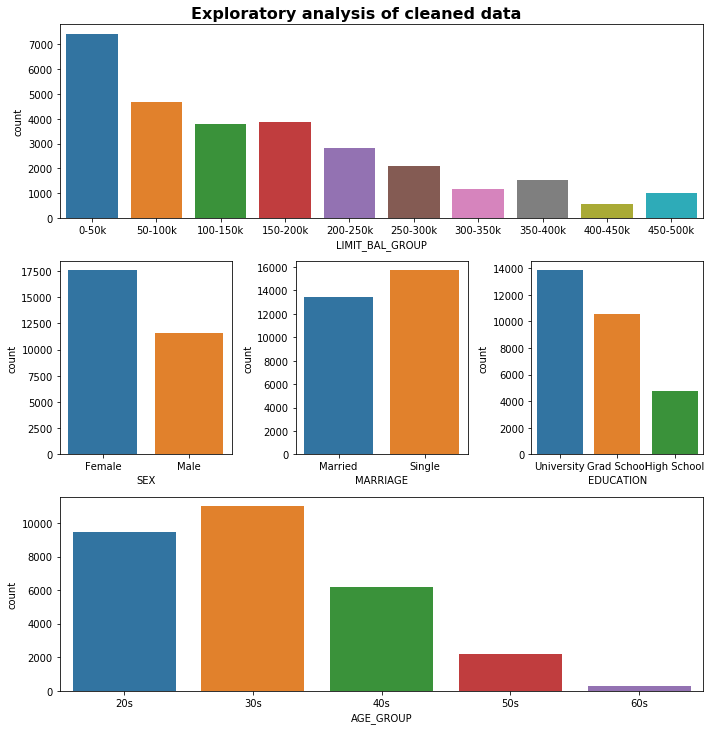

In [9]:
# Visualization cleaned data.
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0),)
ax3 = plt.subplot2grid((3, 3), (1, 1),)
ax4 = plt.subplot2grid((3, 3), (1, 2),)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plotlist = ['LIMIT_BAL_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUP']
for col, ax in zip(plotlist, fig.get_axes()):
    sns.countplot(x=col, data=df, ax=ax)
plt.suptitle('Exploratory analysis of cleaned data', y=1.01, fontsize=16, weight='bold')
plt.tight_layout()

In [10]:
# Store the intermediate data.
df.to_csv('Data_Cleaning.csv', index_label = False)

:)